<a href="https://colab.research.google.com/github/Jowayria-27/Fashion_Survey/blob/main/K-Means%20Surveys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graduation Project**
Finding Trends and Patterns concerning user engagement of survey responders of traditional surveys against gamified survey


In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statistics as s

First of all, we need to read the traditional responses alone

In [347]:
df_trad = pd.read_csv('https://raw.githubusercontent.com/Jowayria-27/Fashion_Survey/refs/heads/main/Trad.csv')
df_trad.head(10)
df_gamified=pd.read_csv('https://raw.githubusercontent.com/Jowayria-27/Fashion_Survey/refs/heads/main/Gamified.csv')
df_gamified.head(10)

,Survey Type,Starttime,Endtime,Duration,Name,Age,Education level,Gender,SQ1,SQ2,...,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12
0,Gamified,15:43:50,15:51:11,0:07:21,Sarah Noaman,21-30,Undergraduate,Female,strongly_agree,agree,...,Strongly Agree,Very Helpful,It was easy for me to answer and finish the su...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,Agree
1,Gamified,15:46:44,15:58:57,0:12:12,Jana Elhini,21-30,Undergraduate,Female,agree,strongly_agree,...,Strongly Agree,Extremely Helpful,The survey effectively made me think about fas...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,"The survey was very fun to answer, the format,...",Strongly Agree
2,Gamified,15:49:31,16:13:20,0:23:49,FAKHER FARID,61+,Bachelor,Male,agree,agree,...,Agree,Very Helpful,It was easy for me to answer and finish the su...,Agree,Agree,Agree,Agree,Agree,Shorter better,Neutral
3,Gamified,15:50:47,15:57:35,0:06:47,maya moneib,21-30,Undergraduate,Female,agree,agree,...,Strongly Agree,Very Helpful,It was easy for me to answer and finish the su...,Strongly Agree,Agree,Agree,Agree,Agree,NaN,Strongly Agree
4,Gamified,15:54:45,16:09:28,0:14:43,Eman wahid,21-30,Undergraduate,Female,agree,strongly_agree,...,Strongly Agree,Extremely Helpful,The survey effectively made me think about fas...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,Strongly Agree
5,Gamified,15:56:35,16:14:40,0:18:05,Nada,21-30,Undergraduate,Female,agree,disagree,...,Strongly Agree,Extremely Helpful,"The survey was interesting, and I enjoyed answ...",Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,it is perfect in my own opinion. very fun as w...,Strongly Agree
6,Gamified,15:58:00,16:06:53,0:08:52,Tasneem,21-30,Postgraduate_student,Female,agree,strongly_agree,...,Agree,Very Helpful,"The survey was interesting, and I enjoyed answ...",Agree,Agree,Neutral,Neutral,Agree,NaN,Neutral
7,Gamified,16:00:15,16:05:58,0:05:43,Rawan,21-30,Undergraduate,Female,agree,agree,...,Strongly Agree,Extremely Helpful,It was easy for me to answer and finish the su...,Strongly Agree,Neutral,Agree,Agree,Agree,NaN,Strongly Agree
8,Gamified,16:05:35,16:12:10,0:06:35,khadija khaled,21-30,Bachelor,Female,strongly_agree,strongly_agree,...,Strongly Agree,Extremely Helpful,It was easy for me to answer and finish the su...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,the survey was entertaining to answer. the rew...,Agree
9,Gamified,16:13:39,16:19:11,0:05:31,Hala Halim,51-60,Bachelor,Female,strongly_agree,strongly_agree,...,Agree,Very Helpful,It was easy for me to answer and finish the su...,Agree,Agree,Agree,Agree,Agree,NaN,Neutral


Next, we see the info in the dataset. We see the following:
1. Starttime, Endtime, and Duration need to be changed to time
2. SQ5, 6,7,8,9,10, 12,16 have some null answers. Out of 147 respondants, 1 or 2 people skipped questions
3. For Question 16, two people skipped it, 15 people wrote in the other section, the rest choose from the two answers
4. For Question 17, 101 people answered the queston while 46 people skipped it. I want to check how many people answered gibberish and how many actually answered good answers
5. For Question 11 in Feedback, only 47 people responded meaning 100 people did not respond. I need to check how many answered gibberish and how many people actually answered
6. FQ1, FQ2, FQ3 is perceived Usability
7. FQ4,FQ6,FQ7 is reward factor
8. FQ8, FQ9 is Focused Attention
9. FQ10 is the aesthetic appeal
10. FQ5 would be analyzed in order to determine main motivation for completing the questionnaire



In [348]:
df_trad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survey Type      147 non-null    object
 1   Starttime        147 non-null    object
 2   Endtime          147 non-null    object
 3   Duration         147 non-null    object
 4   Name             147 non-null    object
 5   Age              147 non-null    object
 6   Education level  147 non-null    object
 7   Gender           147 non-null    object
 8   SQ1              147 non-null    object
 9   SQ2              147 non-null    object
 10  SQ3              147 non-null    object
 11  SQ4              147 non-null    object
 12  SQ5              145 non-null    object
 13  SQ6              147 non-null    object
 14  SQ7              144 non-null    object
 15  SQ8              147 non-null    object
 16  SQ9              146 non-null    object
 17  SQ10             146 non-null    ob

In [349]:
df_trad.describe()

,Survey Type,Starttime,Endtime,Duration,Name,Age,Education level,Gender,SQ1,SQ2,...,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11
count,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,47
unique,1,136,138,22,146,7,6,2,4,4,...,3,4,5,5,4,4,5,5,5,43
top,Traditional,17:00:00,10:41:00,0:05:00,Rana Ewais,21-30,Bachelor Degree Holder,Female,Agree,Agree,...,Strongly Agree,Strongly Agree,Very Helpful,People I know were interested in or sent me th...,Agree,Agree,Agree,Agree,Agree,.
freq,147,3,2,28,2,68,65,114,81,69,...,68,69,58,49,62,67,60,63,67,4


In [350]:
df_trad.isnull().sum()

,0
Survey Type,0
Starttime,0
Endtime,0
Duration,0
Name,0
Age,0
Education level,0
Gender,0
SQ1,0
SQ2,0


In [351]:
for column in df_trad.columns:
    print(f"{column} : {df_trad[column].value_counts()}")
    print("====================================")

Survey Type : Survey Type
Traditional    147
Name: count, dtype: int64
Starttime : Starttime
17:00:00    3
19:49:00    3
14:15:00    3
12:12:00    2
11:30:00    2
           ..
10:08:00    1
22:41:00    1
1:10:00     1
23:40:00    1
11:08:00    1
Name: count, Length: 136, dtype: int64
Endtime : Endtime
10:41:00    2
22:32:00    2
19:07:00    2
19:55:00    2
19:23:00    2
           ..
10:16:00    1
22:47:00    1
1:20:00     1
23:47:00    1
11:15:00    1
Name: count, Length: 138, dtype: int64
Duration : Duration
0:05:00    28
0:06:00    25
0:07:00    16
0:04:00    13
0:08:00    11
0:10:00    10
0:09:00    10
0:12:00     7
0:03:00     6
0:11:00     4
0:15:00     3
0:02:00     3
0:18:00     2
0:23:00     1
0:13:00     1
0:25:00     1
0:22:00     1
0:20:00     1
0:16:00     1
0:17:00     1
0:14:00     1
0:01:00     1
Name: count, dtype: int64
Name : Name
Rana Ewais           2
Maryam Elgharraz     1
Jana Abdelgawad      1
Hala Halim           1
Rasha Hanafy         1
                    ..

In [352]:
columns_to_fix = [f'FQ{i}' for i in list(range(1, 4)) + list(range(6, 11)) + [12]]

# Standardize responses (fix typos + handle case/whitespace)
response_mapping = {
    r'disgree': 'disagree',               # Fix 'disgree' typo
    r'strongly\s*disgree': 'strongly disagree',  # Fix 'strongly disgree' typo
    r'strongly\s*disagree': 'strongly disagree', # Ensure consistency
    r'disagree': 'disagree'               # Standardize
}

# Apply to all specified columns
for col in columns_to_fix:
    if col in df_gamified.columns:
        df_gamified[col] = (
            df_gamified[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .replace(response_mapping, regex=True)
            .str.title()  # Capitalize first letters (optional)
        )

df_gamified['FQ10'].value_counts()

,count
FQ10,
Strongly Agree,79
Agree,53
Neutral,12
Disagree,2
Strongly Disagree,1


In [353]:
df_trad['FQ4'] = df_trad['FQ4'].str.strip().replace("Not helpful", "Not Helpful")
df_trad['FQ4'].value_counts()

,count
FQ4,
Very Helpful,58
Extremely Helpful,55
Moderately Helpful,26
Slightly Helpful,6
Not Helpful,2


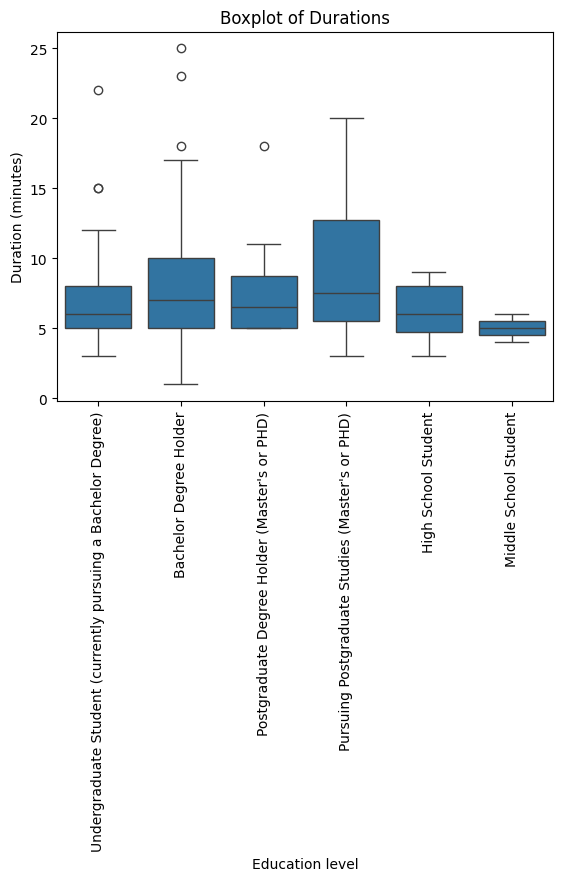

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert Duration to total minutes (or seconds) for plotting
df_trad['Duration']= pd.to_timedelta(df_trad['Duration'])
df_trad['Duration_minutes'] = df_trad['Duration'].dt.total_seconds() / 60

# Step 2: Create the boxplot
sns.boxplot(x='Education level',y='Duration_minutes', data=df_trad)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

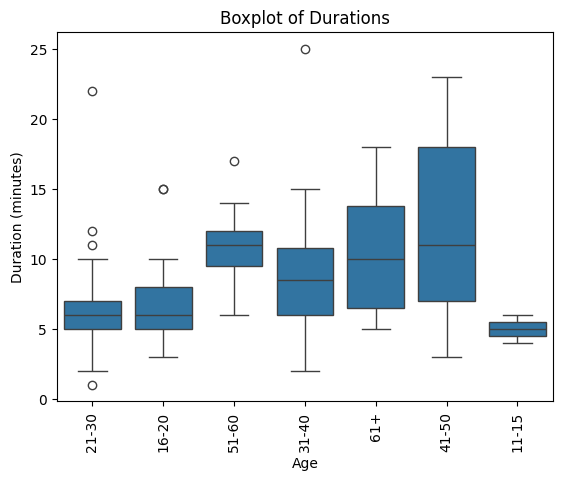

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert Duration to total minutes (or seconds) for plotting
df_trad['Duration_minutes'] = df_trad['Duration'].dt.total_seconds() / 60

# Step 2: Create the boxplot
sns.boxplot(x='Age',y='Duration_minutes', data=df_trad)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

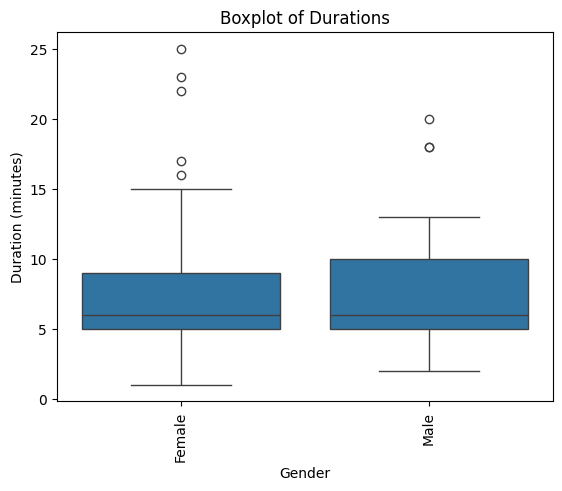

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert Duration to total minutes (or seconds) for plotting
df_trad['Duration_minutes'] = df_trad['Duration'].dt.total_seconds() / 60

# Step 2: Create the boxplot
sns.boxplot(x='Gender',y='Duration_minutes', data=df_trad)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

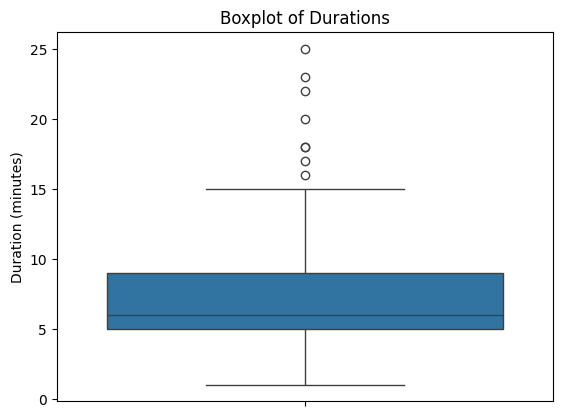

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert Duration to total minutes (or seconds) for plotting
df_trad['Duration_minutes'] = df_trad['Duration'].dt.total_seconds() / 60

# Step 2: Create the boxplot
sns.boxplot(y='Duration_minutes', data=df_trad)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

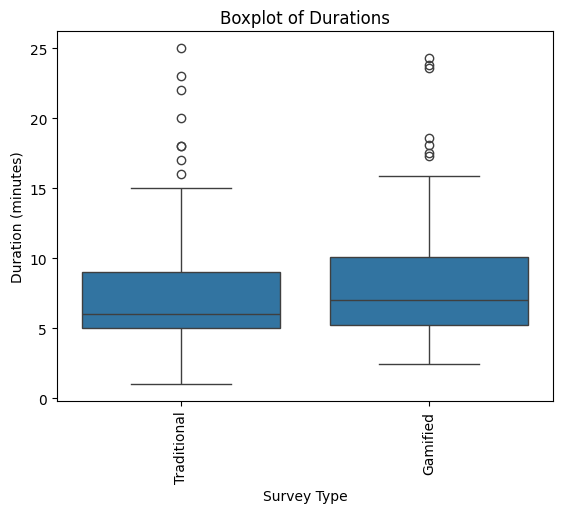

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
df_grad=pd.read_csv('https://raw.githubusercontent.com/Jowayria-27/Fashion_Survey/refs/heads/main/Grad.csv')
df_grad['Duration'] = pd.to_timedelta(df_grad['Duration'])
# Step 1: Convert Duration to total minutes (or seconds) for plotting
df_grad['Duration_minutes'] = df_grad['Duration'].dt.total_seconds() / 60

# Step 2: Create the boxplot
sns.boxplot(x='Survey Type', y='Duration_minutes', data=df_grad)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

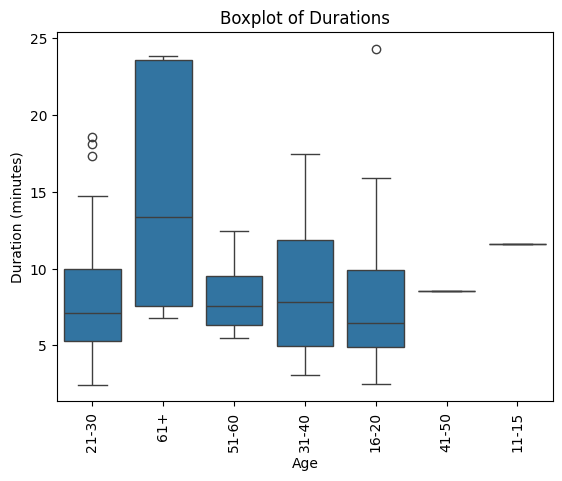

In [359]:
df_gamified=pd.read_csv('https://raw.githubusercontent.com/Jowayria-27/Fashion_Survey/refs/heads/main/Gamified.csv')
df_gamified['Age'] = df_gamified['Age'].replace('45976', '11-15')
df_gamified['Duration'] = pd.to_timedelta(df_gamified['Duration'])
# Step 1: Convert Duration to total minutes (or seconds) for plotting
df_gamified['duration_minutes'] = df_gamified['Duration'].dt.total_seconds() / 60

# Step 2: Create the boxplot
sns.boxplot(x='Age', y='duration_minutes', data=df_gamified)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

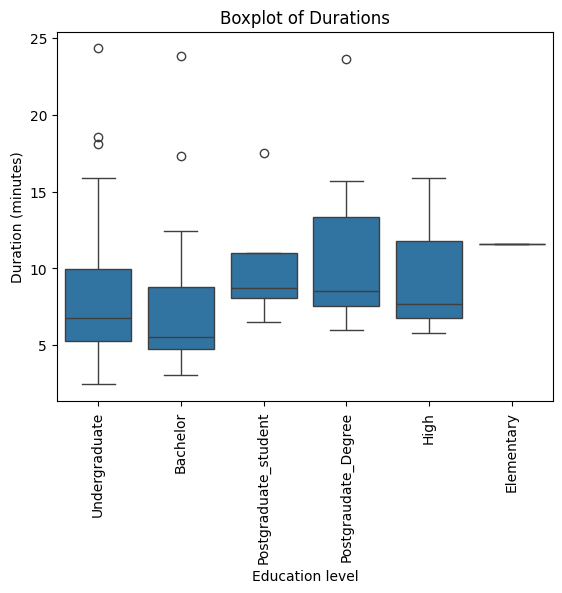

In [360]:

# Step 2: Create the boxplot
sns.boxplot(x='Education level', y='duration_minutes', data=df_gamified)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

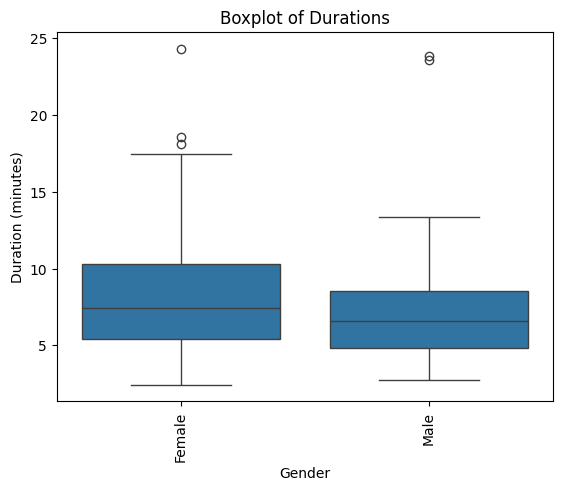

In [361]:

# Step 2: Create the boxplot
sns.boxplot(x='Gender', y='duration_minutes', data=df_gamified)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

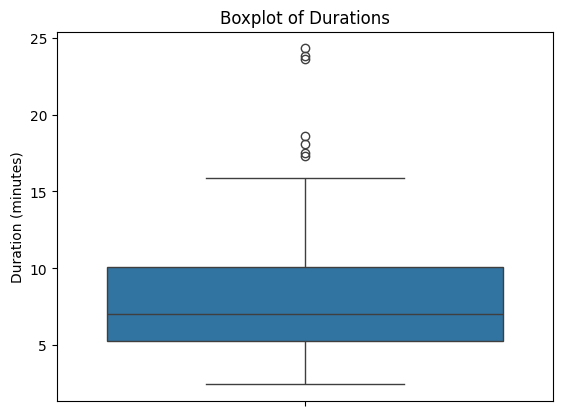

In [362]:

# Step 2: Create the boxplot
sns.boxplot(y='duration_minutes', data=df_gamified)
plt.ylabel('Duration (minutes)')
plt.title('Boxplot of Durations')
plt.xticks(rotation=90)
plt.show()

In [363]:
mean_val_gamified = df_gamified['Duration'].mean()
std_val_game = df_gamified['Duration'].std()
mean_val = df_trad['Duration'].mean()
std_val = df_trad['Duration'].std()
print(mean_val_gamified)
print(std_val_game)
print(mean_val)
print(std_val)

0 days 00:08:00.210884353
0 days 00:04:08.097396674
0 days 00:07:35.510204081
0 days 00:04:06.463155915


In [364]:
df_gamified.head()

,Survey Type,Starttime,Endtime,Duration,Name,Age,Education level,Gender,SQ1,SQ2,...,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,duration_minutes
0,Gamified,15:43:50,15:51:11,0 days 00:07:21,Sarah Noaman,21-30,Undergraduate,Female,strongly_agree,agree,...,Very Helpful,It was easy for me to answer and finish the su...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,Agree,7.350000
1,Gamified,15:46:44,15:58:57,0 days 00:12:12,Jana Elhini,21-30,Undergraduate,Female,agree,strongly_agree,...,Extremely Helpful,The survey effectively made me think about fas...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,"The survey was very fun to answer, the format,...",Strongly Agree,12.200000
2,Gamified,15:49:31,16:13:20,0 days 00:23:49,FAKHER FARID,61+,Bachelor,Male,agree,agree,...,Very Helpful,It was easy for me to answer and finish the su...,Agree,Agree,Agree,Agree,Agree,Shorter better,Neutral,23.816667
3,Gamified,15:50:47,15:57:35,0 days 00:06:47,maya moneib,21-30,Undergraduate,Female,agree,agree,...,Very Helpful,It was easy for me to answer and finish the su...,Strongly Agree,Agree,Agree,Agree,Agree,NaN,Strongly Agree,6.783333
4,Gamified,15:54:45,16:09:28,0 days 00:14:43,Eman wahid,21-30,Undergraduate,Female,agree,strongly_agree,...,Extremely Helpful,The survey effectively made me think about fas...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,Strongly Agree,14.716667


In [365]:
sq_columns = [f'SQ{i}' for i in range(1, 18)]
null_counts = df_gamified[sq_columns].isna().sum()
print(null_counts)

SQ1      0
SQ2      0
SQ3      2
SQ4      0
SQ5      3
SQ6      0
SQ7      1
SQ8      0
SQ9      0
SQ10     0
SQ11     1
SQ12     1
SQ13     0
SQ14     0
SQ15     1
SQ16     0
SQ17    33
dtype: int64




*   Question 3 and 5 2/ 3 people skipped
*   Question 7, 11,12,15 1 person skipped
* only 33 people skipped the open ended question out of 147. Meaning 114 answered the long answer compared to the 100 who did in the traditional survey.







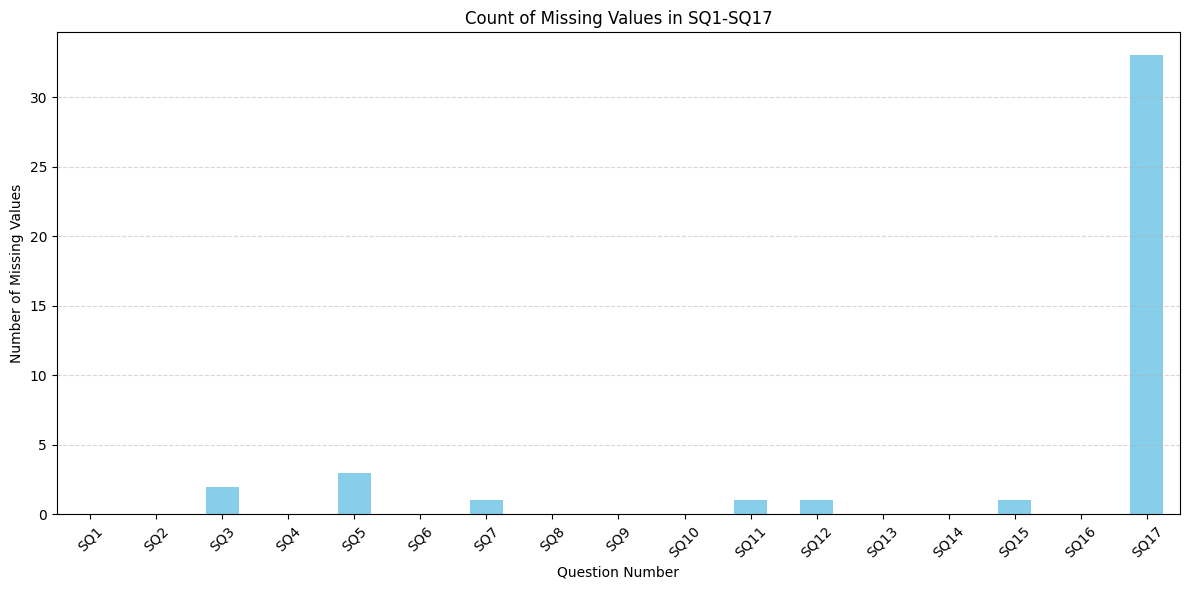

In [366]:
import matplotlib.pyplot as plt

null_counts = df_gamified.loc[:, 'SQ1':'SQ17'].isna().sum()

plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue')

plt.title('Count of Missing Values in SQ1-SQ17')
plt.xlabel('Question Number')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

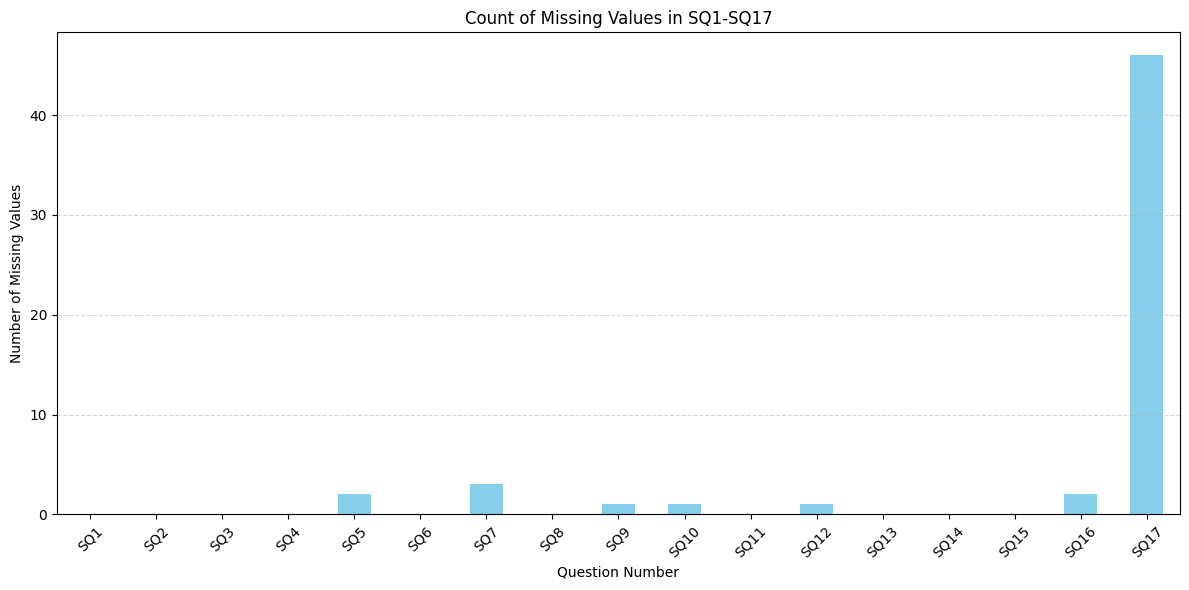

In [367]:
import matplotlib.pyplot as plt

null_counts = df_trad.loc[:, 'SQ1':'SQ17'].isna().sum()

plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue')

plt.title('Count of Missing Values in SQ1-SQ17')
plt.xlabel('Question Number')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

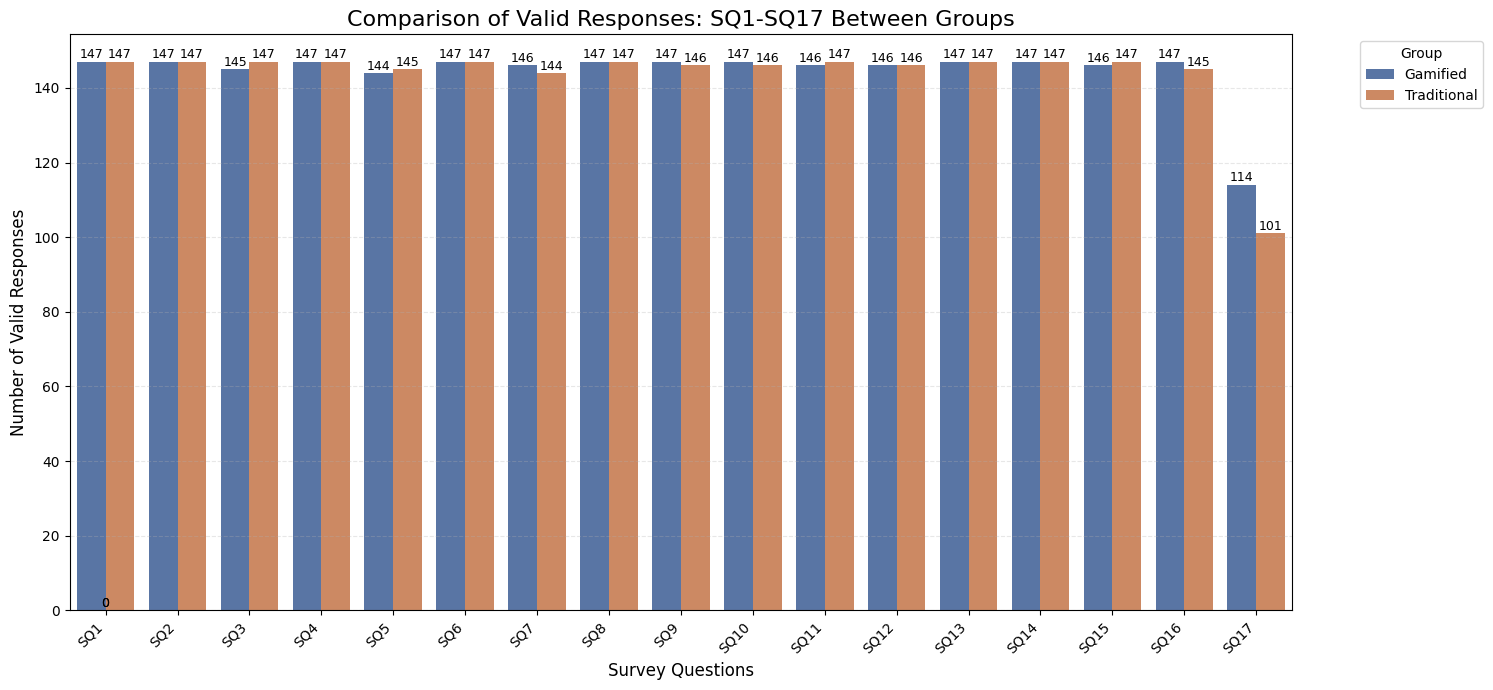

In [368]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate non-null counts for both DataFrames
non_null_gamified = df_gamified.loc[:, 'SQ1':'SQ17'].count()
non_null_trad = df_trad.loc[:, 'SQ1':'SQ17'].count()

# Prepare question labels
questions = [f'SQ{i}' for i in range(1, 18)]

# Combine results into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Question': questions * 2,  # Repeat for both DataFrames
    'Response Count': pd.concat([non_null_gamified, non_null_trad]),
    'Group': ['Gamified'] * 17 + ['Traditional'] * 17
})

# Create the plot with larger figure size
plt.figure(figsize=(15, 7))
sns.barplot(x='Question', y='Response Count', hue='Group',
            data=comparison_df, palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('Comparison of Valid Responses: SQ1-SQ17 Between Groups', fontsize=16)
plt.xlabel('Survey Questions', fontsize=12)
plt.ylabel('Number of Valid Responses', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability

# Add value labels on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9)

plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

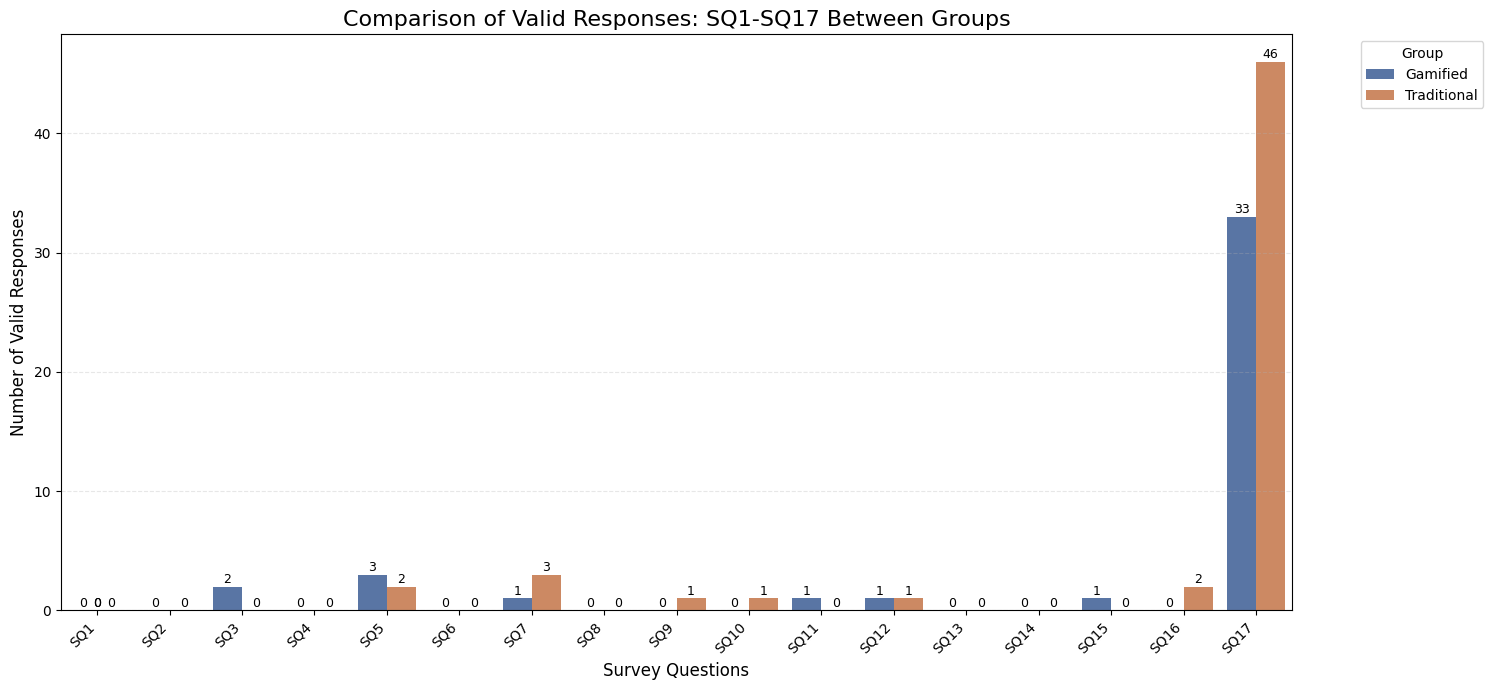

In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate non-null counts for both DataFrames
non_null_gamified = df_gamified.loc[:, 'SQ1':'SQ17'].isnull().sum()
non_null_trad = df_trad.loc[:, 'SQ1':'SQ17'].isnull().sum()

# Prepare question labels
questions = [f'SQ{i}' for i in range(1, 18)]

# Combine results into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Question': questions * 2,  # Repeat for both DataFrames
    'Response Count': pd.concat([non_null_gamified, non_null_trad]),
    'Group': ['Gamified'] * 17 + ['Traditional'] * 17
})

# Create the plot with larger figure size
plt.figure(figsize=(15, 7))
sns.barplot(x='Question', y='Response Count', hue='Group',
            data=comparison_df, palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('Comparison of Valid Responses: SQ1-SQ17 Between Groups', fontsize=16)
plt.xlabel('Survey Questions', fontsize=12)
plt.ylabel('Number of Valid Responses', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability

# Add value labels on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9)

plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

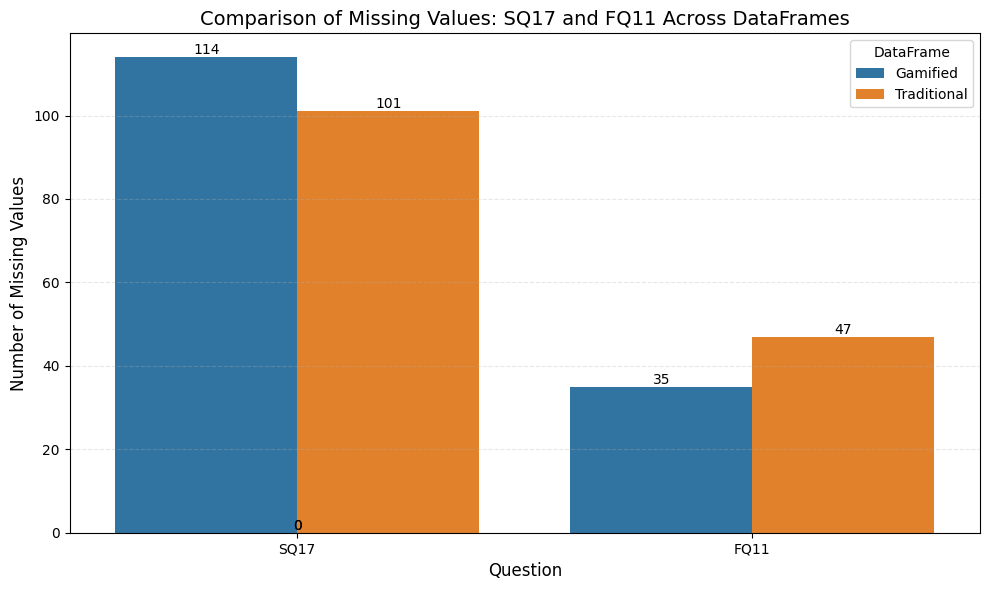

In [370]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have two DataFrames: df1 and df2
# First, let's calculate null counts for both DataFrames

# For DataFrame 1
null_counts_df1 = df_gamified[['SQ17', 'FQ11']].count()
# For DataFrame 2
null_counts_df2 = df_trad[['SQ17', 'FQ11']].count()

# Combine the results into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'Question': ['SQ17', 'FQ11', 'SQ17', 'FQ11'],
    'Null Count': pd.concat([null_counts_df1, null_counts_df2]),
    'DataFrame': ['Gamified'] * 2 + ['Traditional'] * 2  # Labels for each DataFrame
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Question', y='Null Count', hue='DataFrame',
            data=comparison_df, palette=['#1f77b4', '#ff7f0e'])

# Customize the plot
plt.title('Comparison of Missing Values: SQ17 and FQ11 Across DataFrames', fontsize=14)
plt.xlabel('Question', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)

# Add value labels on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.legend(title='DataFrame')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Next, let's create the q1 to q10 responses

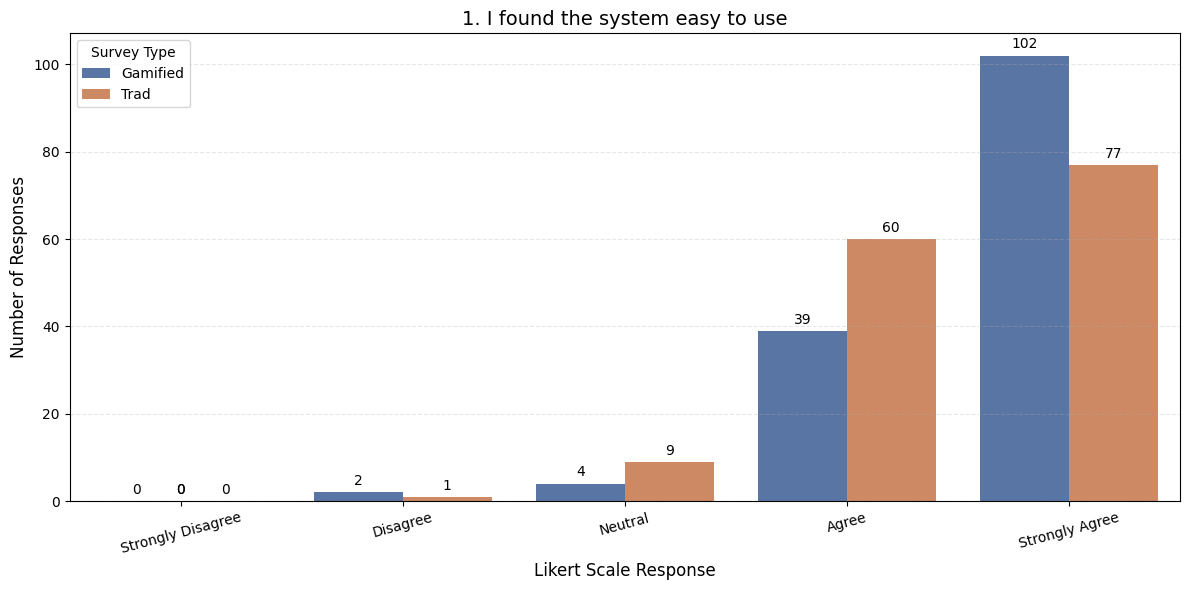

In [371]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ1'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('1. I found the system easy to use', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

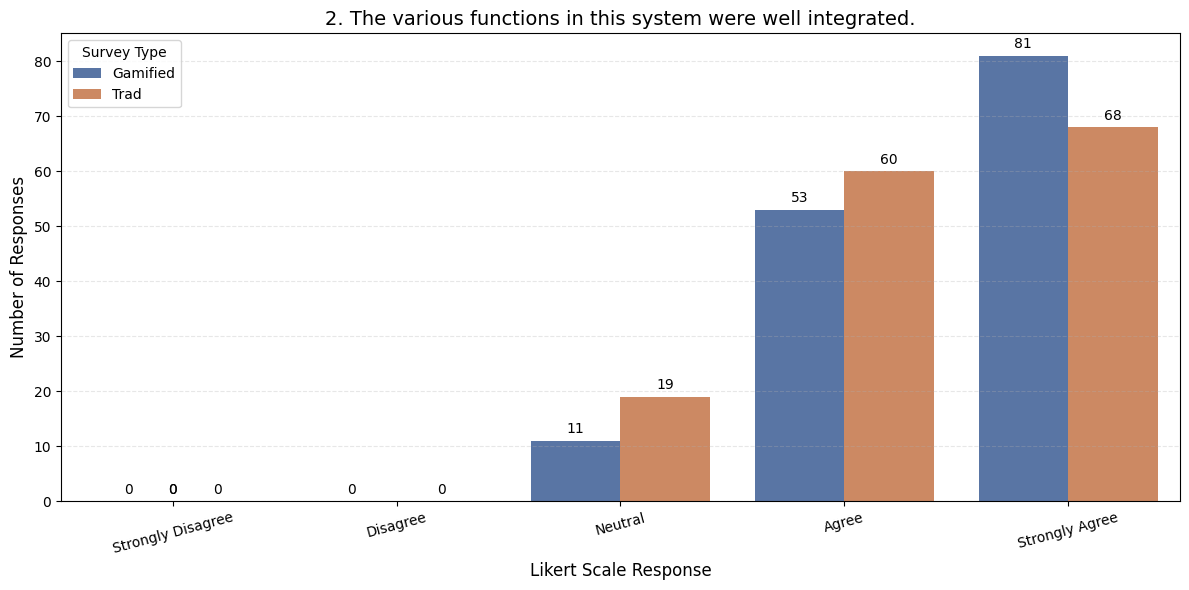

In [372]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ2'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('2. The various functions in this system were well integrated.', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

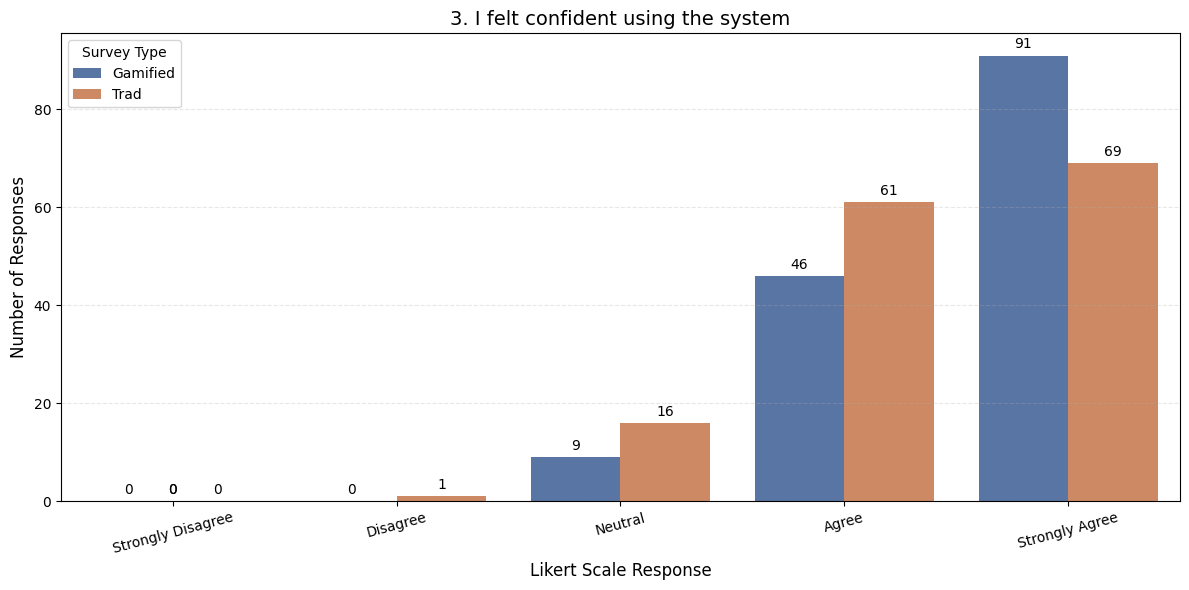

In [373]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ3'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('3. I felt confident using the system', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

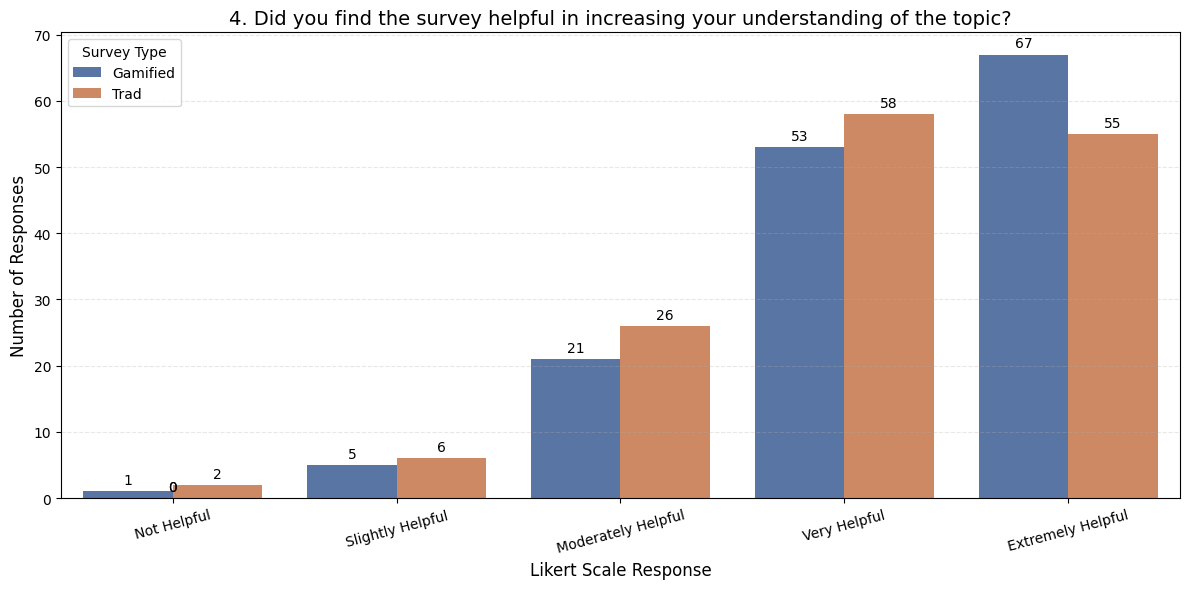

In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ4'

# Define your Likert scale order
likert_order = ['Not Helpful', 'Slightly Helpful' ,'Moderately Helpful','Very Helpful', 'Extremely Helpful' ]


# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('4. Did you find the survey helpful in increasing your understanding of the topic?', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

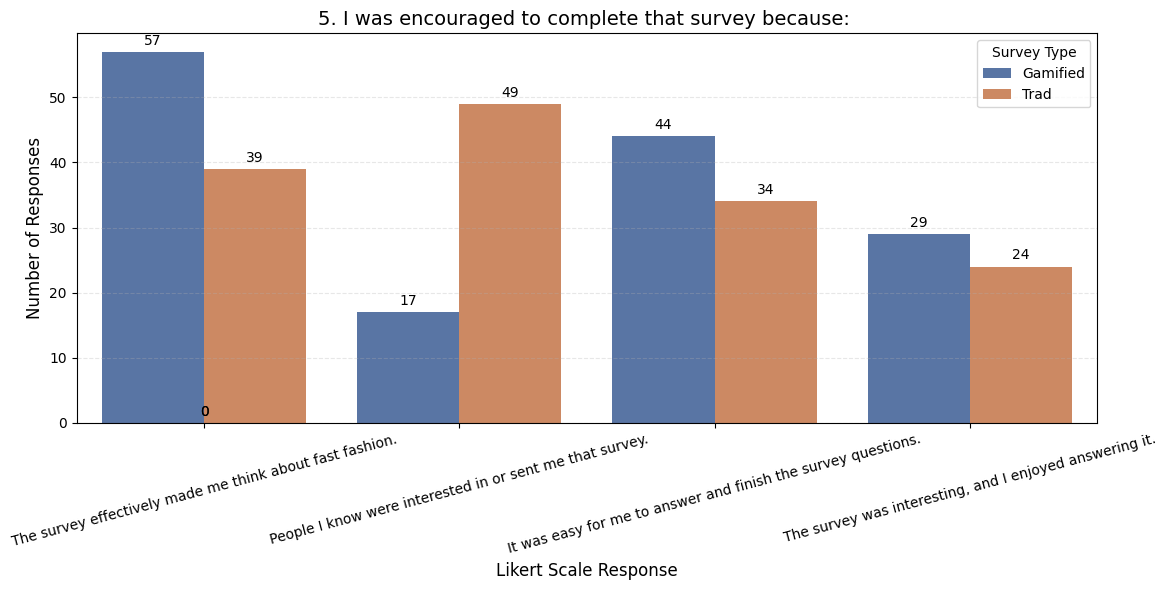

In [375]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ5'

# Define your Likert scale order
likert_order = ['The survey effectively made me think about fast fashion.', 'People I know were interested in or sent me that survey.', 'It was easy for me to answer and finish the survey questions.', 'The survey was interesting, and I enjoyed answering it.']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('5. I was encouraged to complete that survey because: ', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

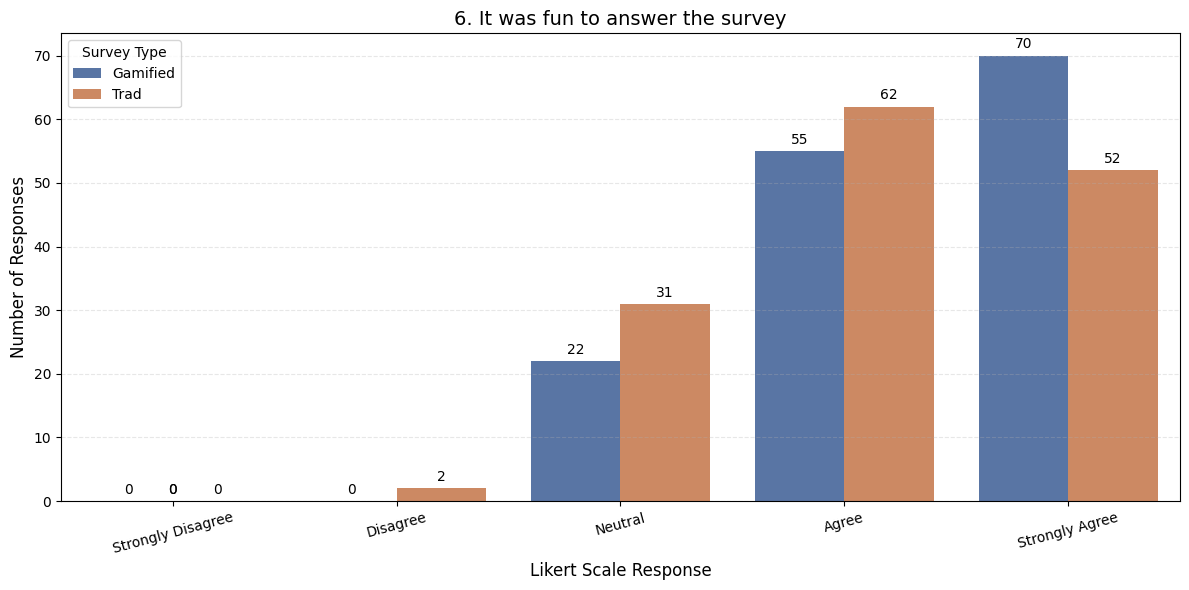

In [376]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ6'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('6. It was fun to answer the survey', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

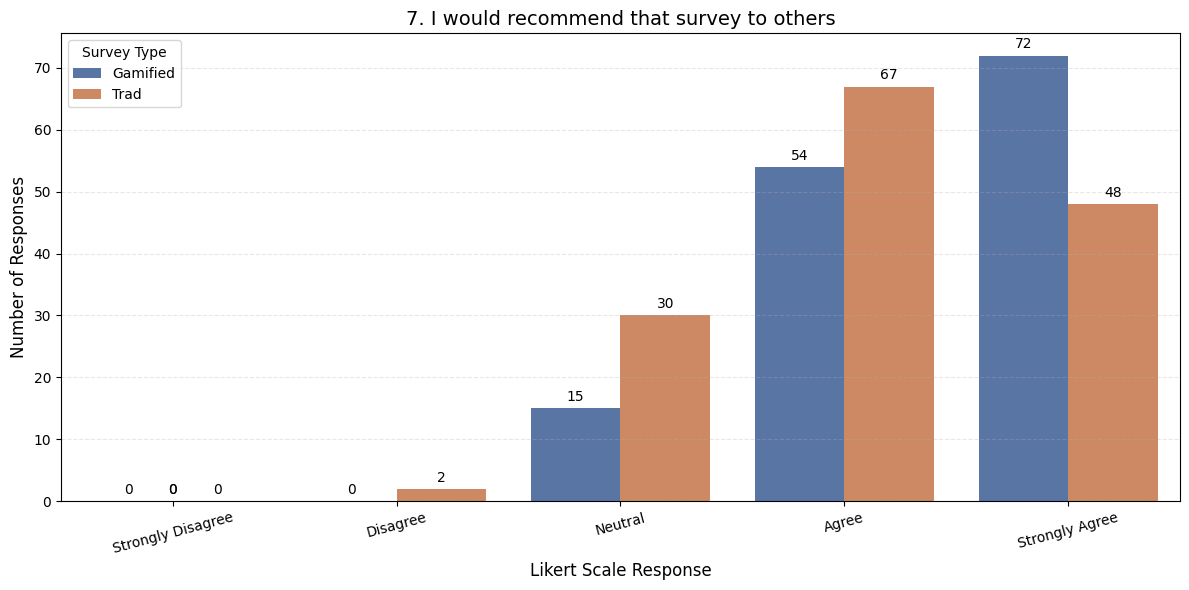

In [377]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ7'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('7. I would recommend that survey to others', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

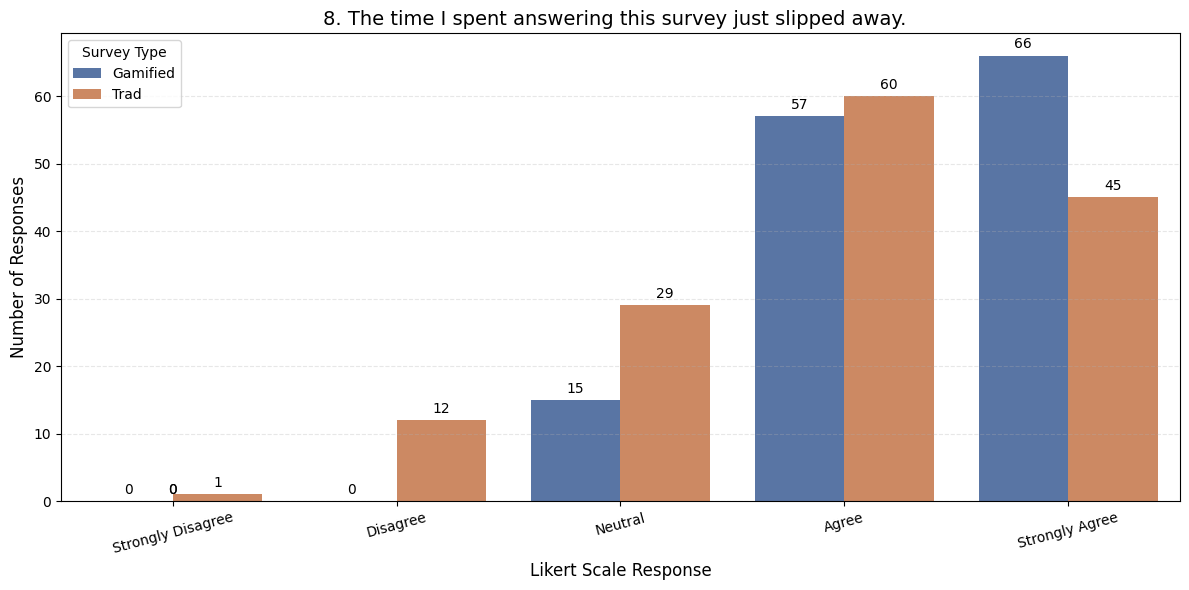

In [378]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ8'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('8. The time I spent answering this survey just slipped away.  ', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

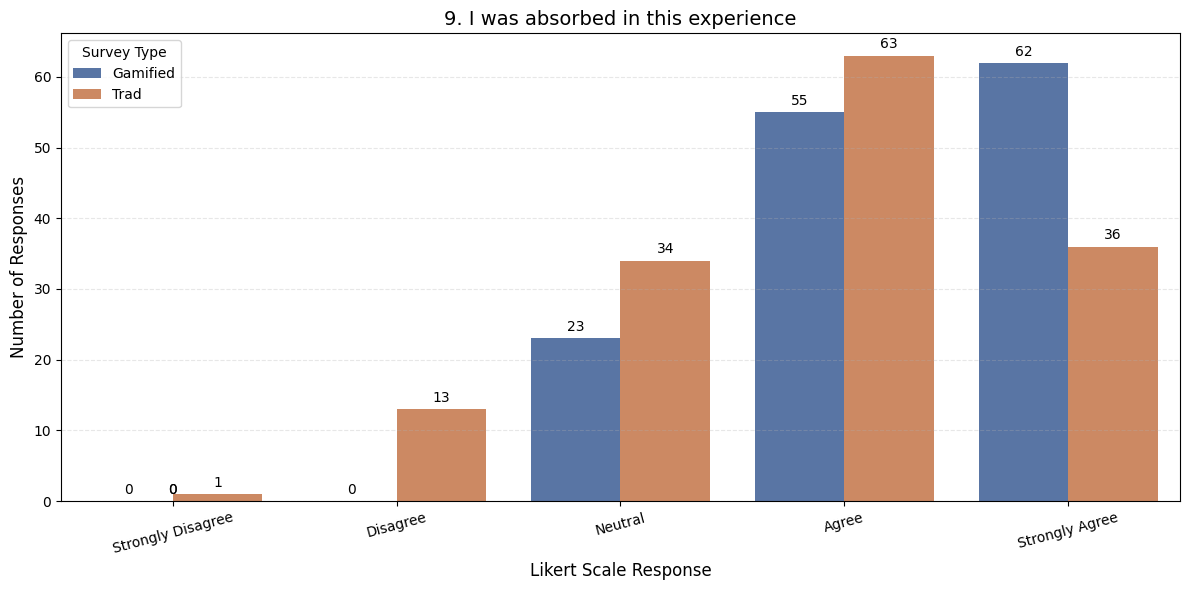

In [386]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ9'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('9. I was absorbed in this experience', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

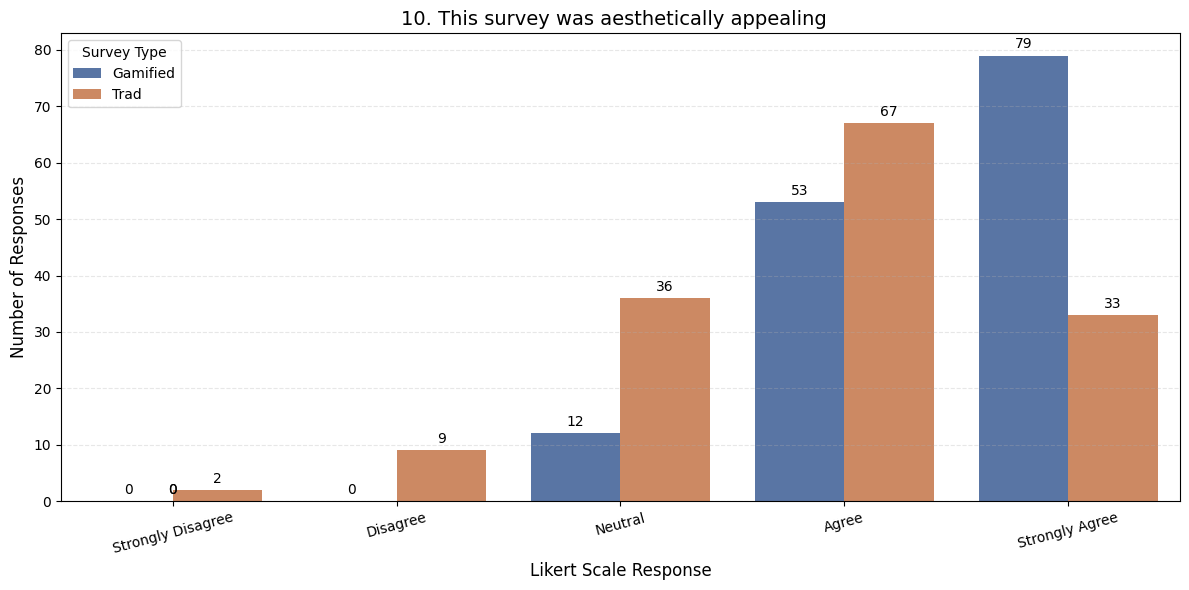

In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ10'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)
trad_counts = df_trad[question].value_counts().reindex(likert_order, fill_value=0)

# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order * 2,
    'Count': pd.concat([gamified_counts, trad_counts]),
    'Survey': ['Gamified'] * len(likert_order) + ['Trad'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('10. This survey was aesthetically appealing  ', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

<ipython-input-381-f78291ef9e5d>:25: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='Response', y='Count', hue='Survey',


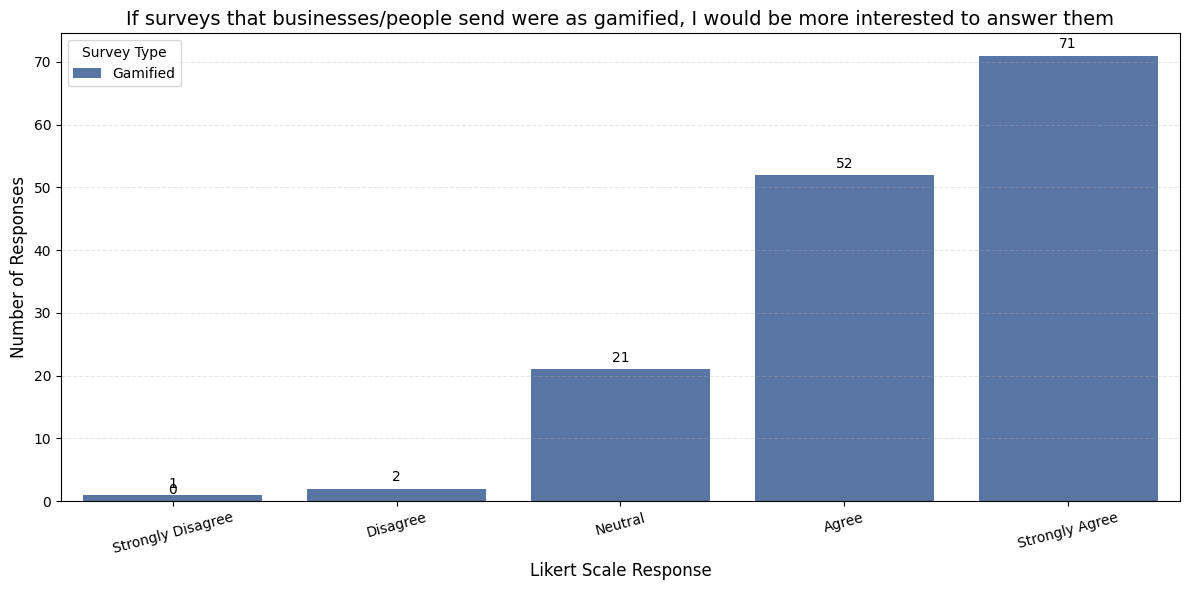

In [381]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrames are df_gamified and df_trad
# And your Likert scale question is 'SQ3' (change as needed)
question = 'FQ12'

# Define your Likert scale order
likert_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Get value counts for each survey
gamified_counts = df_gamified[question].value_counts().reindex(likert_order, fill_value=0)


# Combine into a single DataFrame for plotting
plot_data = pd.DataFrame({
    'Response': likert_order ,
    'Count': pd.concat([gamified_counts]),
    'Survey': ['Gamified'] * len(likert_order)
})

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Response', y='Count', hue='Survey',
            data=plot_data, order=likert_order,
            palette=['#4C72B0', '#DD8452'])

# Customize the plot
plt.title('If surveys that businesses/people send were as gamified, I would be more interested to answer them', fontsize=14)
plt.xlabel('Likert Scale Response', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)
plt.xticks(rotation=15)

# Add value labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.legend(title='Survey Type')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

I want to drop all the columns that will not benefit me so......

In [382]:
df_gamified = df_gamified.drop(['Name', 'Starttime','Endtime'], axis=1)
df_trad=df_trad.drop(['Name', 'Starttime','Endtime'], axis=1)

In [383]:
df_game_copy=df = df_gamified.drop(columns=[f'SQ{i}' for i in range(1, 18)])
df_trad_copy= df_trad.drop(columns=[f'SQ{i}' for i in range(1, 18)])
df_trad_copy= df_trad.drop('FQ11',axis=1)
df_game_copy=df = df_gamified.drop(['FQ11','FQ12'],axis=1);
df_game_copy.head(10)
df_trad_copy.head(10)

,Survey Type,Duration,Age,Education level,Gender,SQ1,SQ2,SQ3,SQ4,SQ5,...,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,Duration_minutes
0,Traditional,0 days 00:12:00,21-30,Undergraduate Student (currently pursuing a Ba...,Female,Disagree,Disagree,Agree,Disagree,Agree,...,Neutral,Agree,Moderately Helpful,People I know were interested in or sent me th...,Neutral,Neutral,Disagree,Disagree,Disagree,12.0
1,Traditional,0 days 00:05:00,16-20,Undergraduate Student (currently pursuing a Ba...,Female,Agree,Strongly Agree,Agree,Agree,Disagree,...,Agree,Agree,Very Helpful,It was easy for me to answer and finish the su...,Agree,Agree,Agree,Agree,Agree,5.0
2,Traditional,0 days 00:05:00,16-20,Undergraduate Student (currently pursuing a Ba...,Female,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,...,Strongly Agree,Strongly Agree,Extremely Helpful,The survey effectively made me think about fas...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,5.0
3,Traditional,0 days 00:10:00,51-60,Bachelor Degree Holder,Female,Strongly Agree,Agree,Strongly Agree,Disagree,Agree,...,Agree,Agree,Moderately Helpful,It was easy for me to answer and finish the su...,Neutral,Agree,Agree,Agree,Agree,10.0
4,Traditional,0 days 00:06:00,51-60,Bachelor Degree Holder,Female,Agree,Agree,Agree,Strongly Disagree,Agree,...,Strongly Agree,Strongly Agree,Extremely Helpful,The survey effectively made me think about fas...,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,6.0
5,Traditional,0 days 00:06:00,21-30,Undergraduate Student (currently pursuing a Ba...,Female,Agree,Disagree,Agree,Agree,Agree,...,Agree,Agree,Extremely Helpful,People I know were interested in or sent me th...,Strongly Agree,Neutral,Agree,Agree,Agree,6.0
6,Traditional,0 days 00:06:00,21-30,Bachelor Degree Holder,Female,Strongly Agree,Strongly Agree,Agree,Disagree,Disagree,...,Strongly Agree,Strongly Agree,Extremely Helpful,It was easy for me to answer and finish the su...,Neutral,Agree,Agree,Agree,Strongly Agree,6.0
7,Traditional,0 days 00:06:00,21-30,Undergraduate Student (currently pursuing a Ba...,Female,Agree,Agree,Agree,Agree,Disagree,...,Agree,Agree,Very Helpful,The survey effectively made me think about fas...,Neutral,Agree,Agree,Agree,Agree,6.0
8,Traditional,0 days 00:08:00,16-20,Undergraduate Student (currently pursuing a Ba...,Female,Agree,Disagree,Strongly Agree,Disagree,Agree,...,Strongly Agree,Agree,Very Helpful,People I know were interested in or sent me th...,Agree,Agree,Agree,Neutral,Neutral,8.0
9,Traditional,0 days 00:12:00,51-60,Bachelor Degree Holder,Female,Strongly Agree,Agree,Strongly Agree,Agree,Agree,...,Agree,Neutral,Moderately Helpful,People I know were interested in or sent me th...,Agree,Agree,Agree,Neutral,Agree,12.0


In [384]:
df['FQ1'] = pd.Categorical(
    df['Contract'],
    categories=['Month-to-month', 'One year', 'Two year'],
    ordered=True
)

KeyError: 'Contract'